### **Ensemble principal patterns**

For details of how the ensemble principal patterns are computed, see _Characterising spatial structure in climate model ensembles, Chandler et al (2022)_

In [1]:
from plotting_methods import *
from indices import var_cv, lc

In [9]:
# load netcdf containing MANOVA data & extract DataArray
da = xr.open_dataset("example_data/tas_12km_epp-gcm_20491201-20791130_annual.nc")        # GCM effects
da = xr.open_dataset("example_data/tas_12km_epp-rcm_20491201-20791130_annual.nc")        # RCM effects
da = xr.open_dataset("example_data/tas_12km_epp-ukcp_20491201-20791130_annual.nc")       # UKCP ensemble members

da = xr.open_dataset("/data/met/plot-explorer/data/cdd/cdd_12km_epp-gcm_19890101-20081231_annual.nc")

In [90]:
# get range of values & colour scheme for maps
vlims = vrange(da.epps)
cmap = fix_cmap(var_cv[da.varnm]["cmap"], **vlims)

# get range of values for score scatterplot
xylims = vrange(da.scores.sel(pc = ["1", "2"]).values * 1.2).values()
   
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# set markers & colours for score plots, depending on which ensemble is being plotted
if "i1p1" in da.run.values[0]:
    
    ens = "GCM"
    markers = [gcm_markers[g] for g in da.run.values]
    colours = "white"
    ec = "black"
    ms = 60
    labels = da.run.values
    handles = [matplotlib.lines.Line2D([], [], color = "white", marker = gcm_markers[g], markersize = ms, markeredgecolor = "black", linestyle = "None") for g in da.run.values]
    legend_title = "GCM"
    
elif "HadREM3-GA7-05" in da.run.values:     
    
    # RCM effects
    ens = "RCM"
    markers = "o"
    colours = [rcm_colours[r] for r in [re.sub(".+_","",rn) for rn in da.run.values]]
    ec = "black"
    ms = 60
    labels = da.run.values
    handles = [matplotlib.lines.Line2D([], [], color = rcm_colours[r], marker = 'o', markersize = ms, markeredgecolor = "black", linestyle = "None") for r in da.run.values]
    legend_title = "RCM"
      
elif len(da.run.values[0]) == 2:
    
    # UKCP ensemble
    ens = "UKCP18"
    markers = ["$" + r + "$" for r in da.run.values]
    ec = [rcm_colours["HadREM3-GA7-05"] if r == "01" else "black" for r in da.run.values]
    ms = 100
    colours = [rcm_colours["HadREM3-GA7-05"] if r == "01" else "black" for r in da.run.values]
    labels = ["Unperturbed", "Perturbed"]
    handles = [matplotlib.lines.Line2D([], [], color = colours[i], marker = "o", markersize = 6, markeredgecolor = "black", linestyle = "None") for i in range(2)]
    legend_title = "Run type"

else:
    
    # otherwise, use generic characters
    markers = "o"
    colours = "black"
    ec = "black"
    ms = 60
    
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# construct plot title & label for colour bar
if da.period == "19890101-20081231":
    cbar_label = "Bias in " + lc(var_cv[da.varnm]["plot_label"])
    plot_title = "EPPs of bias in "+da.season.values[0]+" "+da.varnm+" ("+da.period.values[0]+")"
elif da.period == "19801201-20101130":
    cbar_label = var_cv[da.varnm]["plot_label"]
    plot_title = "EPPs of "+da.season.values[0]+" "+da.varnm+" ("+da.period.values[0]+")"
else:
    cbar_label = "Change in " + lc(var_cv[da.varnm]["plot_label"])
    plot_title = "EPPs of change in "+da.season.values[0]+" "+da.varnm+" (19801201-20101130 - "+da.period.values[0]+")"

Text(0.5, 1.1, 'GCM EPPs of bias in annual cdd for each run (19890101-20081231)')

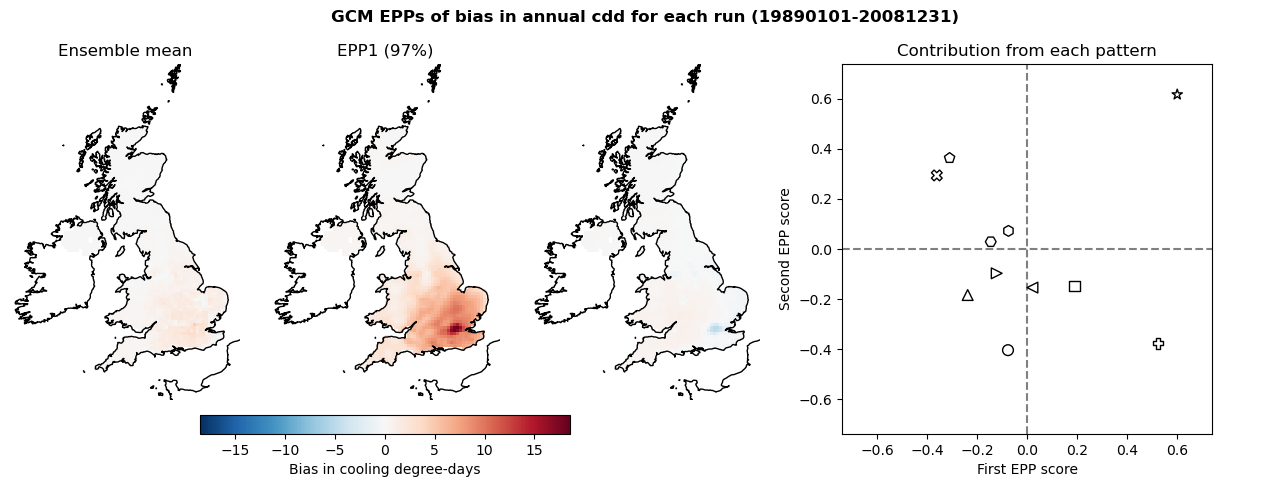

In [89]:
# make grid of subplots with OSGB projection
fig, axs = plt.subplots(ncols = 4, figsize = (13,4), dpi= 100, facecolor='w', edgecolor='k', subplot_kw = {"projection" : crs_osgb}, gridspec_kw = {'width_ratios' : [1,1,1,2]})
fig.subplots_adjust(top = 0.85, wspace = 0)
fig.tight_layout()

# remove borders around axes
for ax in axs: ax.set_axis_off()

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# draw the maps
for i in range(3):
    ax = axs[i]
    cbar = da.epps.isel(pc = i).plot(ax = ax, add_colorbar = False, **vlims, cmap = cmap)
    ax.set_extent((-2e5, 7e5, -1e5, 12.2e5), crs = crs_osgb)
    ax.coastlines()
    
# add titles
axs[0].set_title("Ensemble mean")
for i in [1,2]:
    axs[i].set_title("EPP"+str(i)+" ("+str(round(da.var_expl.isel(pc = i).values[0][0]))+"%)")
    
# add colourbar
plt.colorbar(cbar, ax = axs[:3], location = "bottom", pad = 0.04, fraction = 0.05, label = cbar_label)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# add scatterplot

# add new axes without projection, with equal axes & fixed aspect ratio
ax3 = fig.add_subplot(144, xlim = xylims, ylim = xylims, aspect = "equal", xlabel = "First EPP score", ylabel = "Second EPP score", title = "Contribution from each pattern")
mscatter(da.scores.sel(pc = "1").squeeze(drop = True), da.scores.sel(pc = "2").squeeze(drop = True), ax = ax3, m = markers, c = colours, s = ms, edgecolor = ec, zorder = 9)

# add centre line
ax3.axvline(0, linestyle = "--", color = "grey")
ax3.axhline(0, linestyle = "--", color = "grey")

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
ax.set_title(ens+" "+plot_title, fontweight = "bold", y = 1.1)